In [4]:

# Importing some useful packages

from importlib import reload

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sys
import os


# Visualizations will be shown in the notebook:

%matplotlib inline


# Import local deps

import src.helpers.lineRegressorWithMemory as LRM
import src.helpers.imageProcessing as IP
import src.helpers.plot as P


if 'src.helpers.imageProcessing' in sys.modules:
    print("Reloading Modules...")
    
    reload(LRM)
    reload(IP)
    reload(P)
    
    print("\nModules Reloaded!")


Reloading Modules...

Modules Reloaded!


In [5]:

# Get all the test images

imagesDir = "./input/images/"
imagesNames = os.listdir(imagesDir)

print("Available images:\n")

for imageName in imagesNames: print(imageName)

# imagesNames = ["005 - Yellow Curve.jpg", "007 - Challenge Shadow.jpg"]

imagesCount = len(imagesNames)


# Load all images in RGB and convert them to HSV and HLS too

imagesRGB = list(map(lambda imageName: mpimg.imread(imagesDir + imageName), imagesNames))
imagesHSV = list(map(IP.rgb2hsv, imagesRGB))
imagesHLS = list(map(IP.rgb2hls, imagesRGB))
imagesYW = list(map(IP.yellowAndWhiteHlsFilter, imagesHLS))


Available images:

001 - White Straight.jpg
002 - White Curve.jpg
003 - Yellow Straight.jpg
004 - Yellow Straight White Car Lane Switch.jpg
005 - Yellow Curve.jpg
006 - Yellow Curve White Right Ahead.jpg
007 - Challenge Shadow.jpg


In [6]:

# Plot all images in RGB, HSV and HSL

# Get a grid

gs = P.getGrid(len(imagesNames), 3)

for i in range(imagesCount):
    imageName = imagesNames[i]
    
    ax = plt.subplot(gs[i, 0])
    ax.imshow(imagesRGB[i])
    ax.set_title("RGB %s" % imageName)
    
    ax = plt.subplot(gs[i, 1])
    ax.imshow(imagesHSV[i])
    ax.set_title("HSV %s" % imageName)
    
    ax = plt.subplot(gs[i, 2])
    ax.imshow(imagesHLS[i])
    ax.set_title("HLS %s" % imageName)


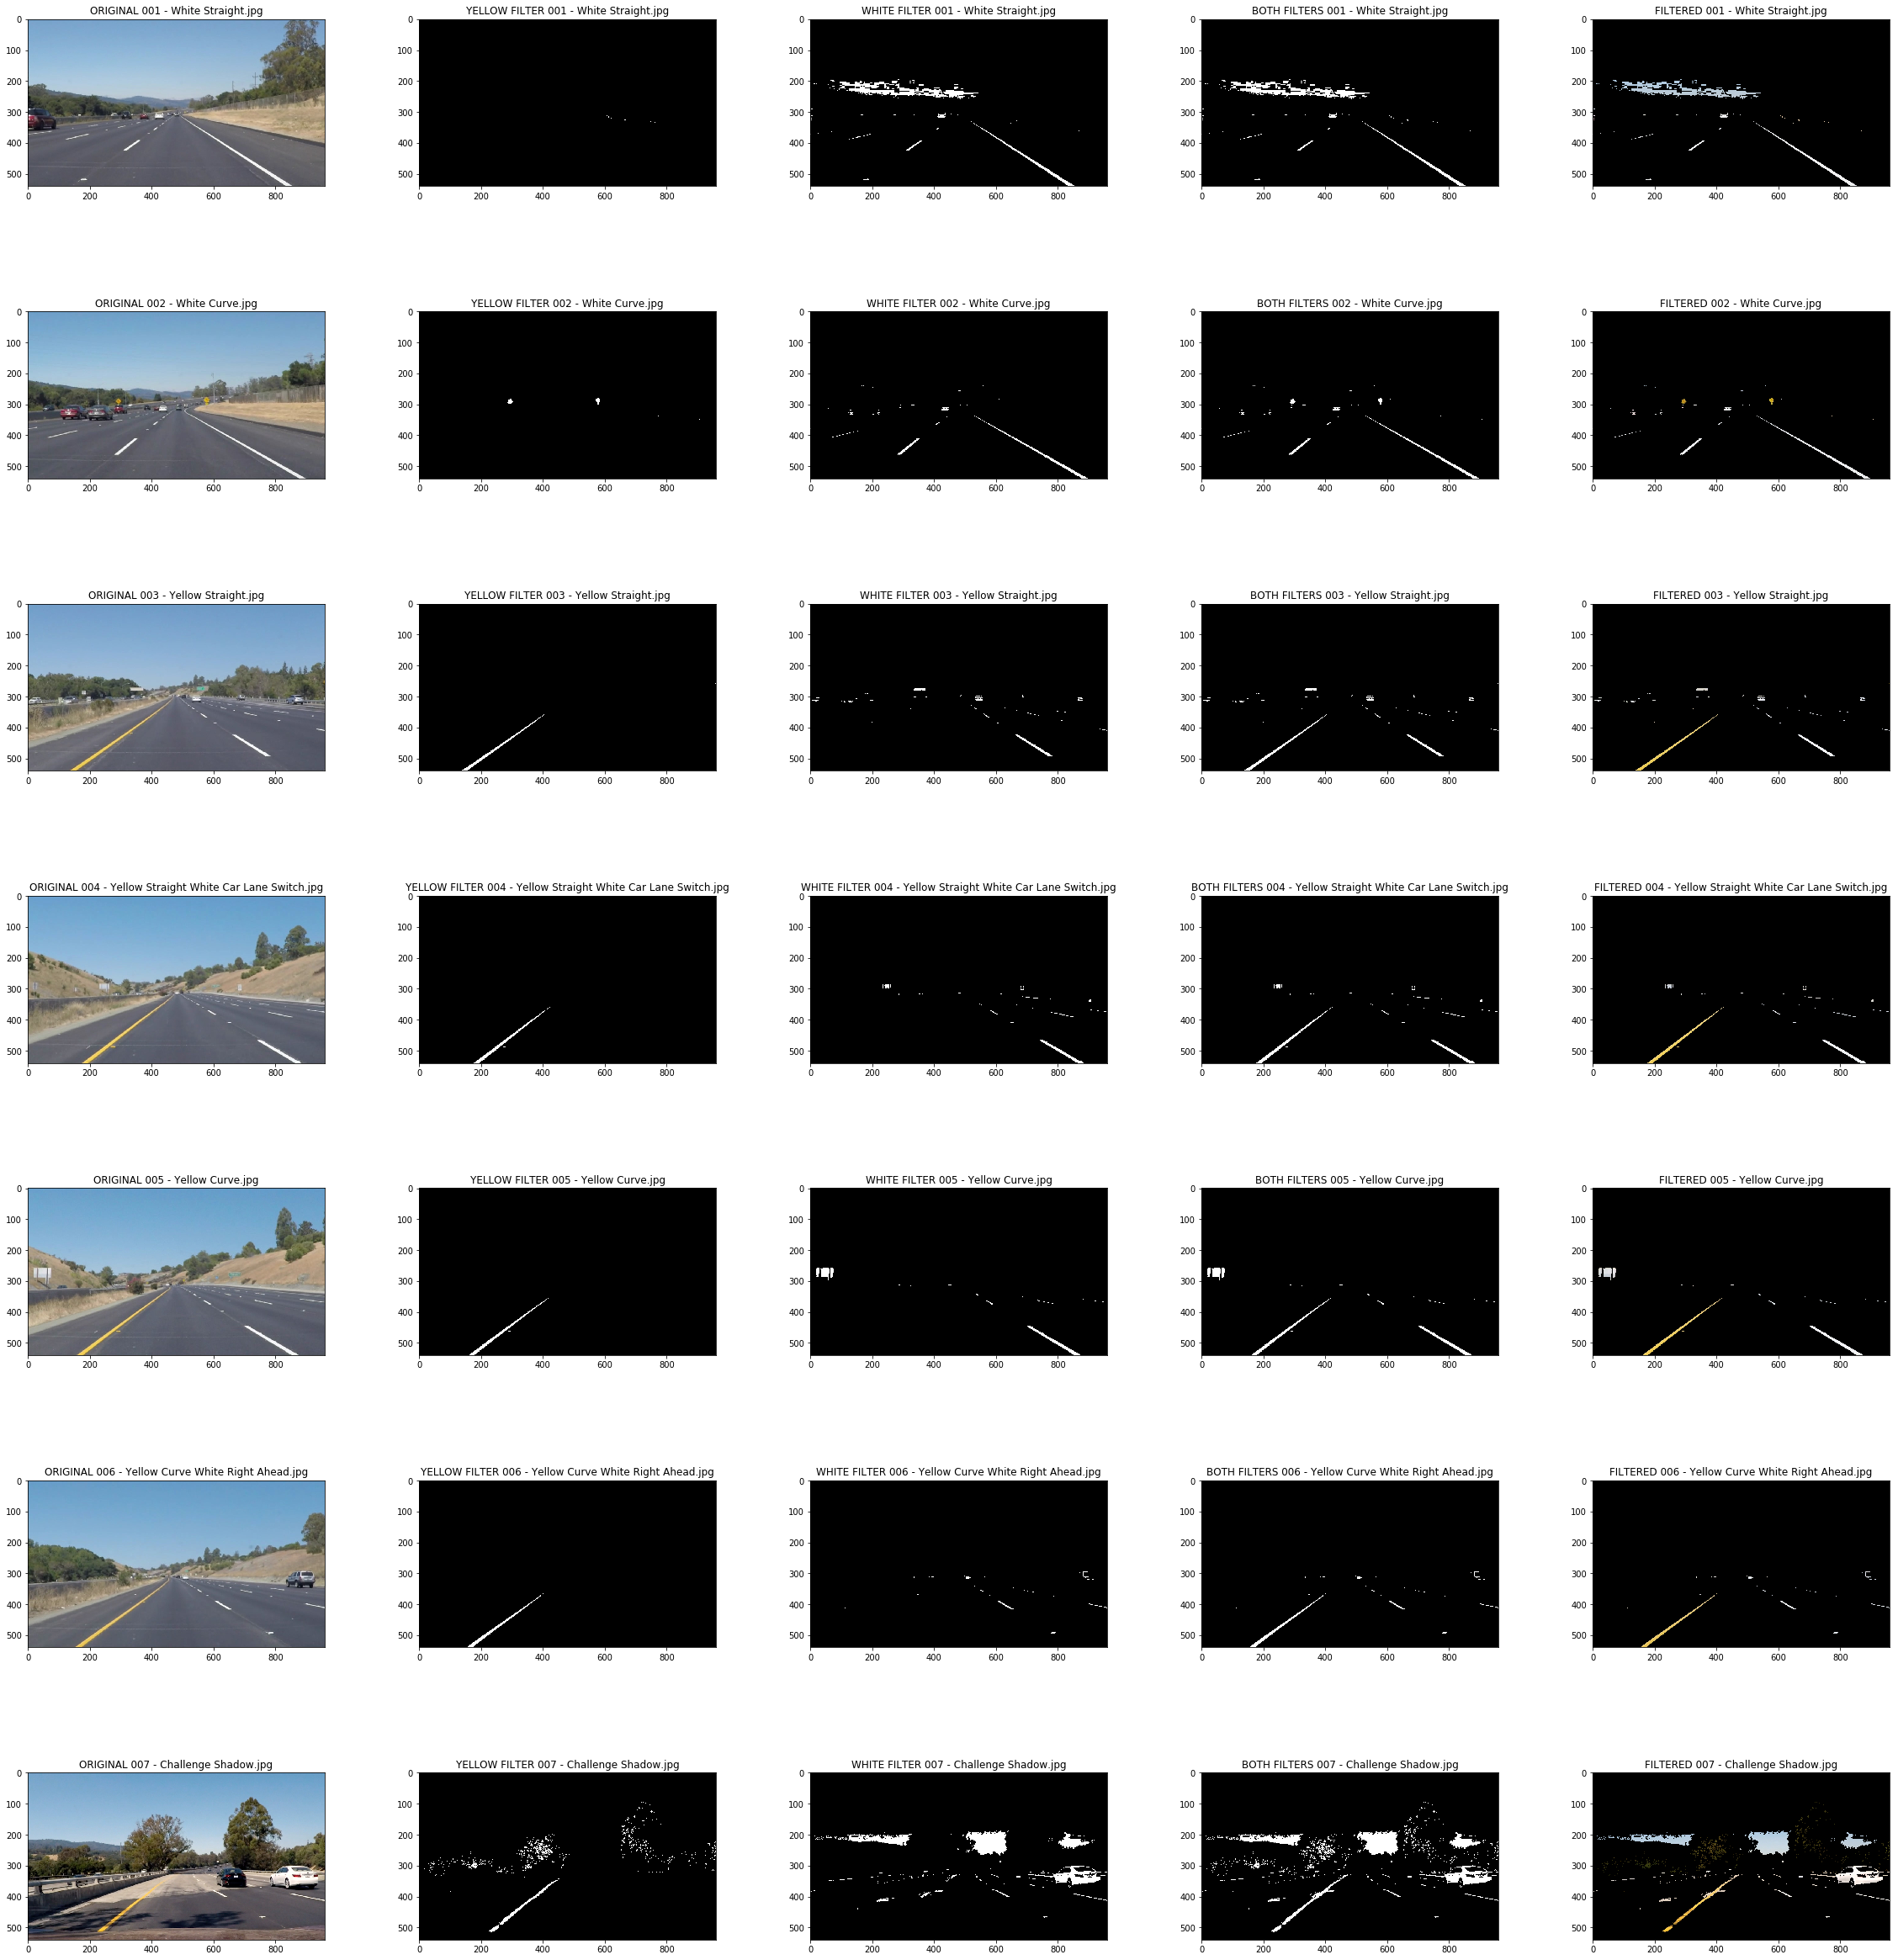

In [7]:

# Plot original image, yellow filter, white filter, both filters and filtered image

# Get a grid

gs = P.getGrid(len(imagesNames), 5) 

for i in range(imagesCount): 
    imageName = imagesNames[i]
    imageRGB = imagesRGB[i]
    imageHLS = imagesHLS[i]
    
    ax = plt.subplot(gs[i, 0])
    ax.imshow(imageRGB)
    ax.set_title("ORIGINAL %s" % imageName)
    
    ax = plt.subplot(gs[i, 1])
    ax.imshow(IP.yellowHlsFilter(imageHLS), cmap="gray")
    ax.set_title("YELLOW FILTER %s" % imageName)
    
    ax = plt.subplot(gs[i, 2])
    ax.imshow(IP.whiteHlsFilter(imageHLS), cmap="gray")
    ax.set_title("WHITE FILTER %s" % imageName)
    
    ax = plt.subplot(gs[i, 3])
    ax.imshow(imagesYW[i], cmap="gray")
    ax.set_title("BOTH FILTERS %s" % imageName)
    
    ax = plt.subplot(gs[i, 4])
    ax.imshow(IP.yellowAndWhiteRgbFiltered(imageRGB), cmap=None)
    ax.set_title("FILTERED %s" % imageName)


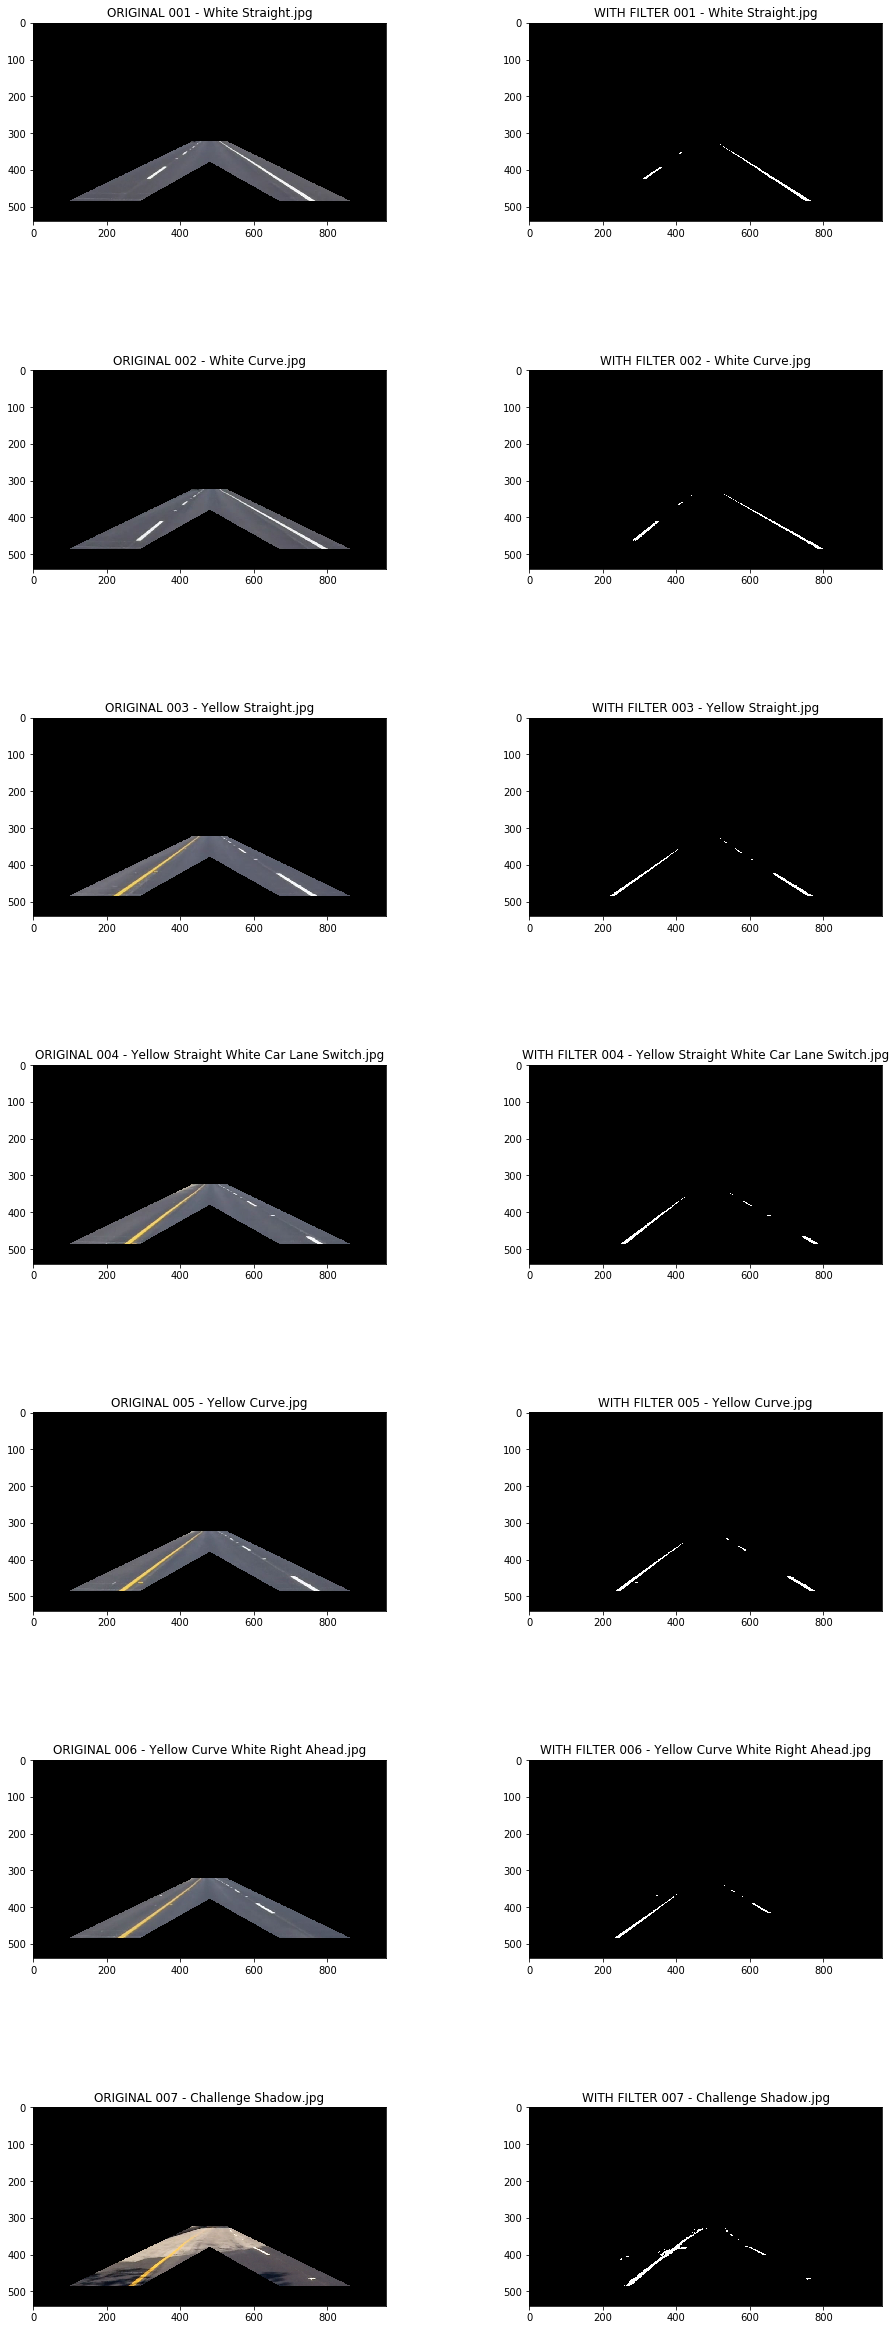

In [8]:

# Filter region of interest (image already B/W)

anyImage = imagesYW[0]

WIDTH = anyImage.shape[1]
HEIGHT = anyImage.shape[0]

REGION_MASK = np.array([[
    # OUTER SHAPE:
    
    (0.10 * WIDTH, 0.90 * HEIGHT),
    (0.45 * WIDTH, 0.60 * HEIGHT),
    (0.55 * WIDTH, 0.60 * HEIGHT),
    (0.90 * WIDTH, 0.90 * HEIGHT),
    
    # INNER CUTOUT:
    
    (0.70 * WIDTH, 0.90 * HEIGHT),
    (0.50 * WIDTH, 0.70 * HEIGHT),
    (0.30 * WIDTH, 0.90 * HEIGHT),
]], dtype=np.int32)

imagesBW = list(map(lambda imageYW: IP.regionOfInterestFilter(imageYW, REGION_MASK), imagesYW))

# Get a grid

gs = P.getGrid(len(imagesNames), 2) 

for i in range(imagesCount): 
    imageName = imagesNames[i]
    imageBW = imagesBW[i]
    imageRGB = imagesRGB[i]
    
    ax = plt.subplot(gs[i, 0])
    ax.imshow(IP.regionOfInterestFilter(imageRGB, REGION_MASK))
    ax.set_title("ORIGINAL %s" % imageName)
    
    ax = plt.subplot(gs[i, 1])
    ax.imshow(imageBW, cmap="gray")
    ax.set_title("WITH FILTER %s" % imageName)


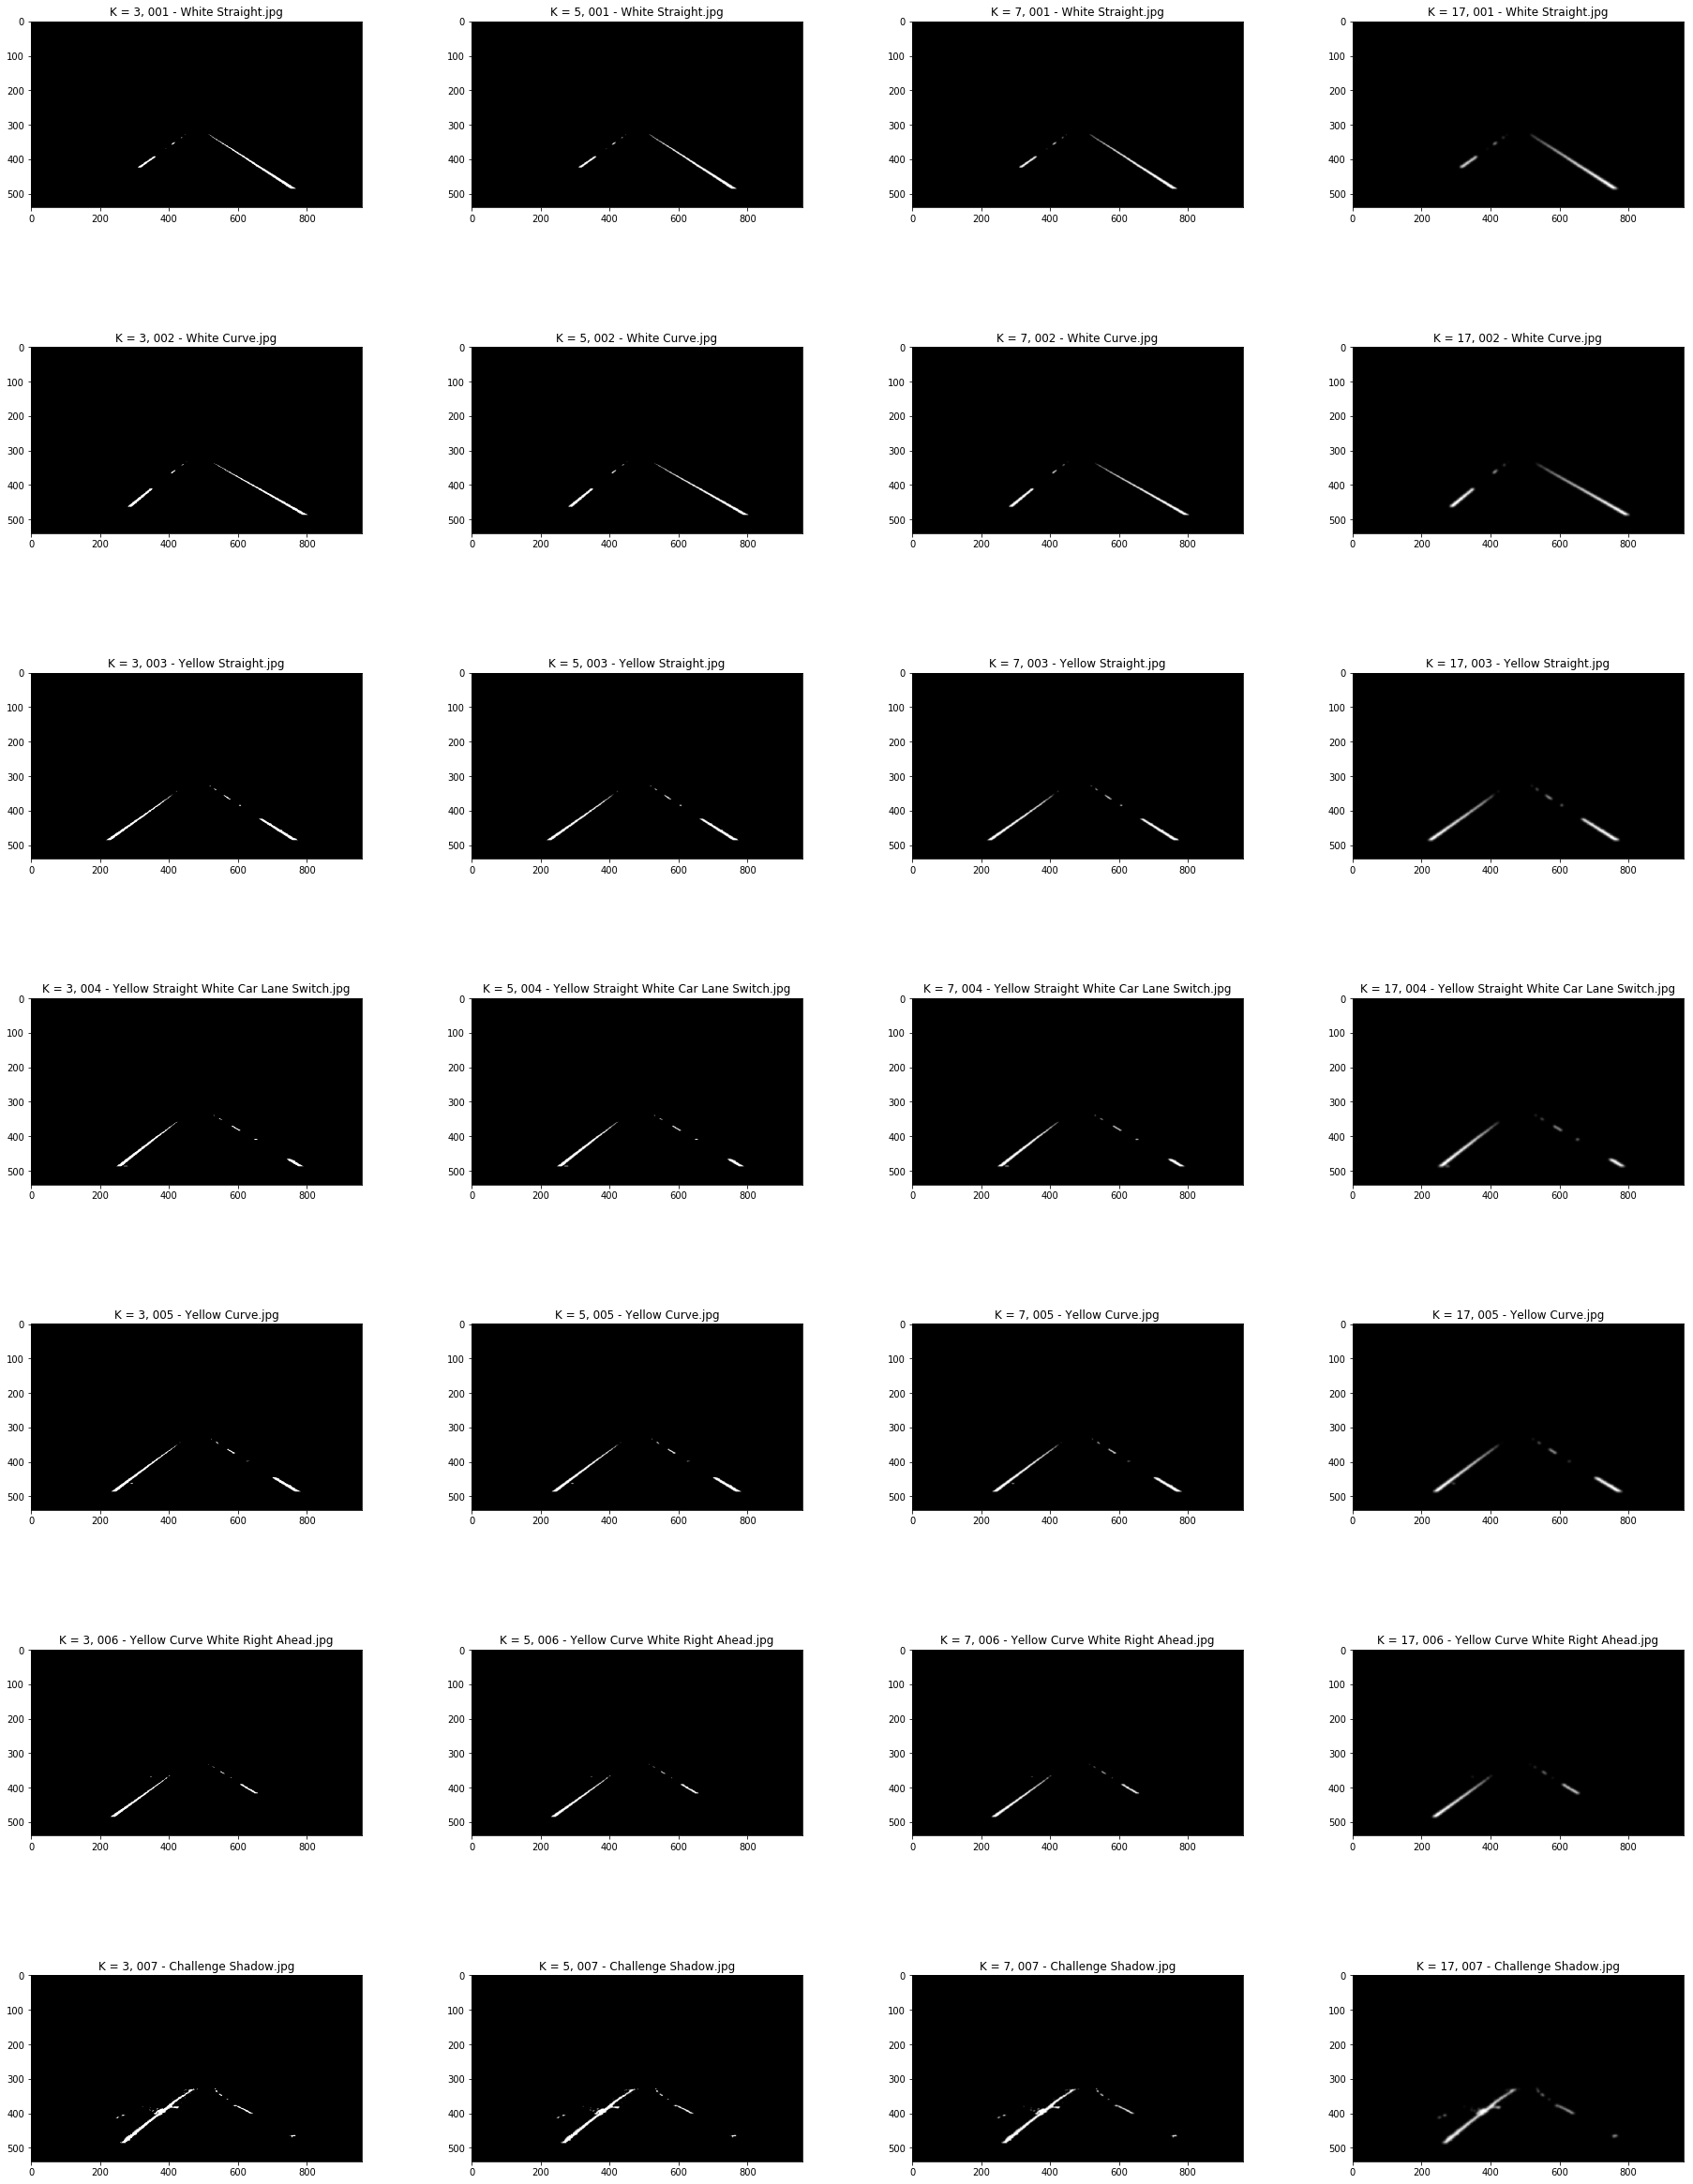

In [9]:

# Blur with different kernels to remove noise

# Get a grid

gs = P.getGrid(len(imagesNames), 4) 

for i in range(imagesCount): 
    imageName = imagesNames[i]
    imageBW = imagesBW[i]
    
    ax = plt.subplot(gs[i, 0])
    ax.imshow(IP.gaussianBlur(imageBW, 3), cmap="gray")
    ax.set_title("K = 3, %s" % imageName)
    
    ax = plt.subplot(gs[i, 1])
    ax.imshow(IP.gaussianBlur(imageBW, 5), cmap="gray")
    ax.set_title("K = 5, %s" % imageName)
    
    ax = plt.subplot(gs[i, 2])
    ax.imshow(IP.gaussianBlur(imageBW, 7), cmap="gray")
    ax.set_title("K = 7, %s" % imageName)
    
    ax = plt.subplot(gs[i, 3])
    ax.imshow(IP.gaussianBlur(imageBW, 17), cmap="gray")
    ax.set_title("K = 17, %s" % imageName)

# We take K = 5

imagesBW = list(map(lambda imageBW: IP.gaussianBlur(imageBW, 5), imagesBW))


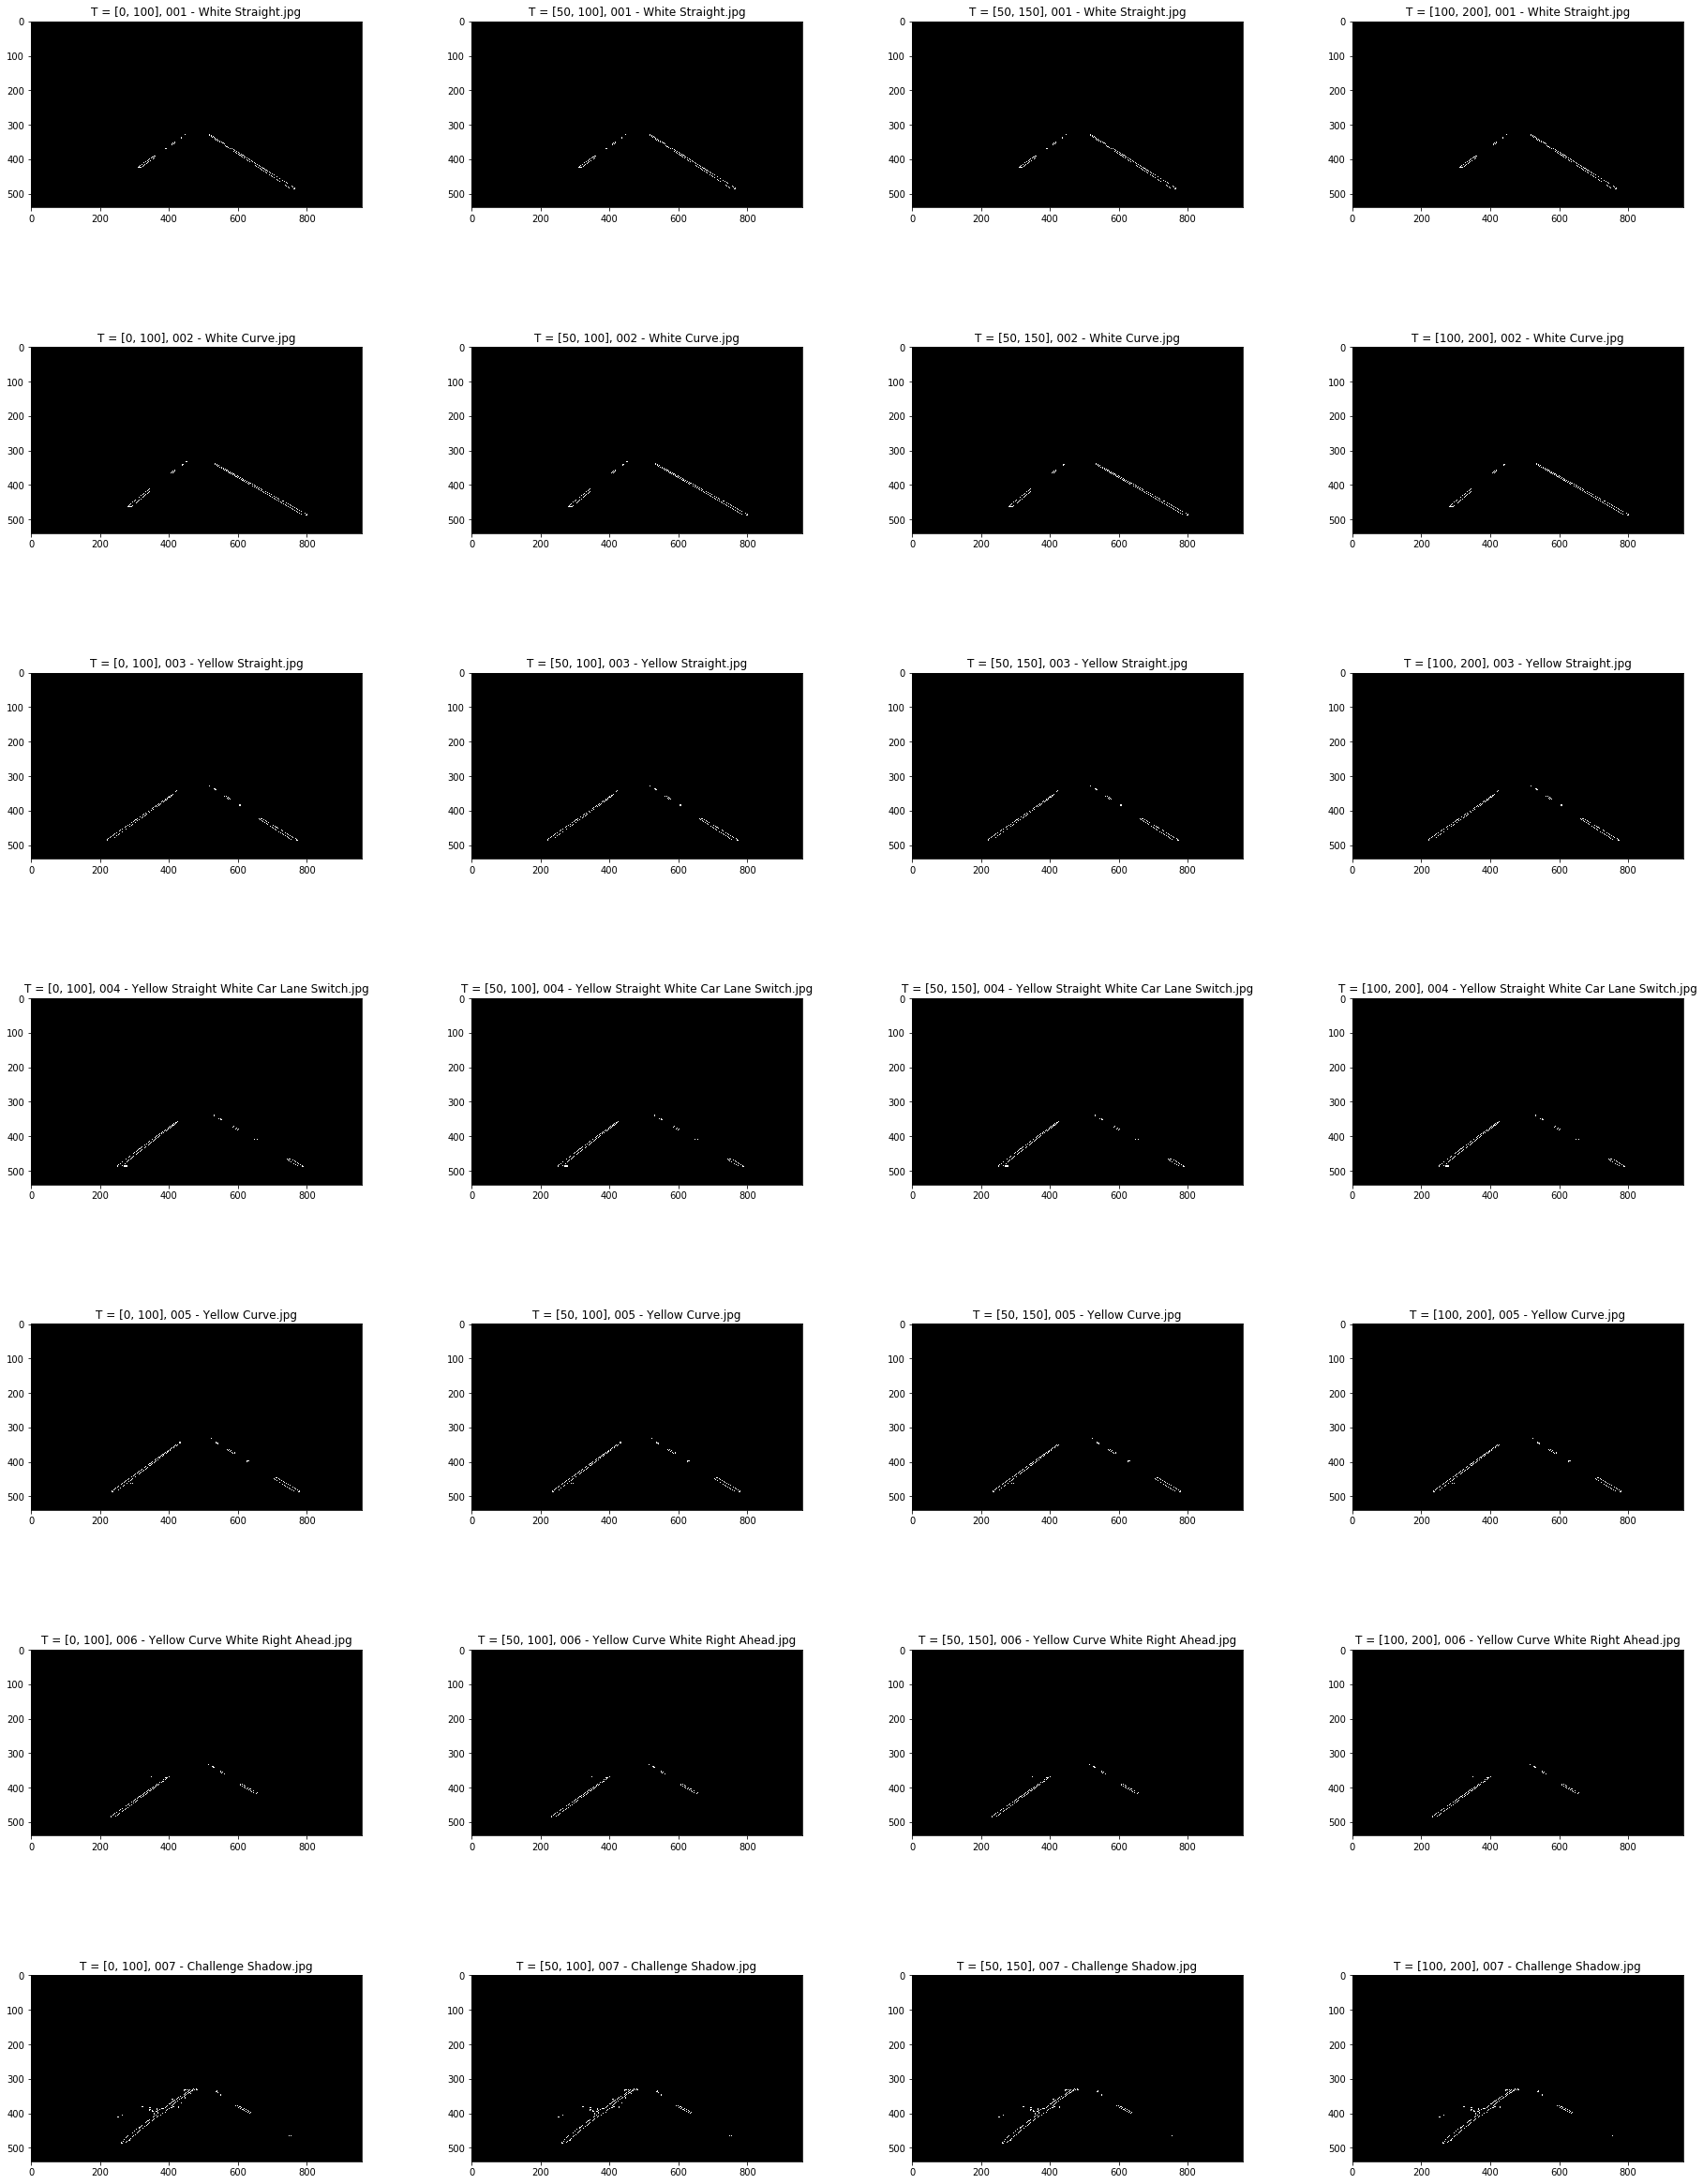

In [10]:

# Apply Canny Edge Detection with different threshold values

# Get a grid

gs = P.getGrid(len(imagesNames), 4) 

for i in range(imagesCount): 
    imageName = imagesNames[i]
    imageBW = imagesBW[i]
    
    ax = plt.subplot(gs[i, 0])
    ax.imshow(IP.canny(imageBW, 0, 100), cmap="gray")
    ax.set_title("T = [0, 100], %s" % imageName)
    
    ax = plt.subplot(gs[i, 1])
    ax.imshow(IP.canny(imageBW, 50, 100), cmap="gray")
    ax.set_title("T = [50, 100], %s" % imageName)
    
    ax = plt.subplot(gs[i, 2])
    ax.imshow(IP.canny(imageBW, 50, 150), cmap="gray")
    ax.set_title("T = [50, 150], %s" % imageName)
    
    ax = plt.subplot(gs[i, 3])
    ax.imshow(IP.canny(imageBW, 100, 200), cmap="gray")
    ax.set_title("T = [100, 200], %s" % imageName)

# We take T = [50, 100]

imagesBW = list(map(lambda imageBW: IP.canny(imageBW, 50, 100), imagesBW))


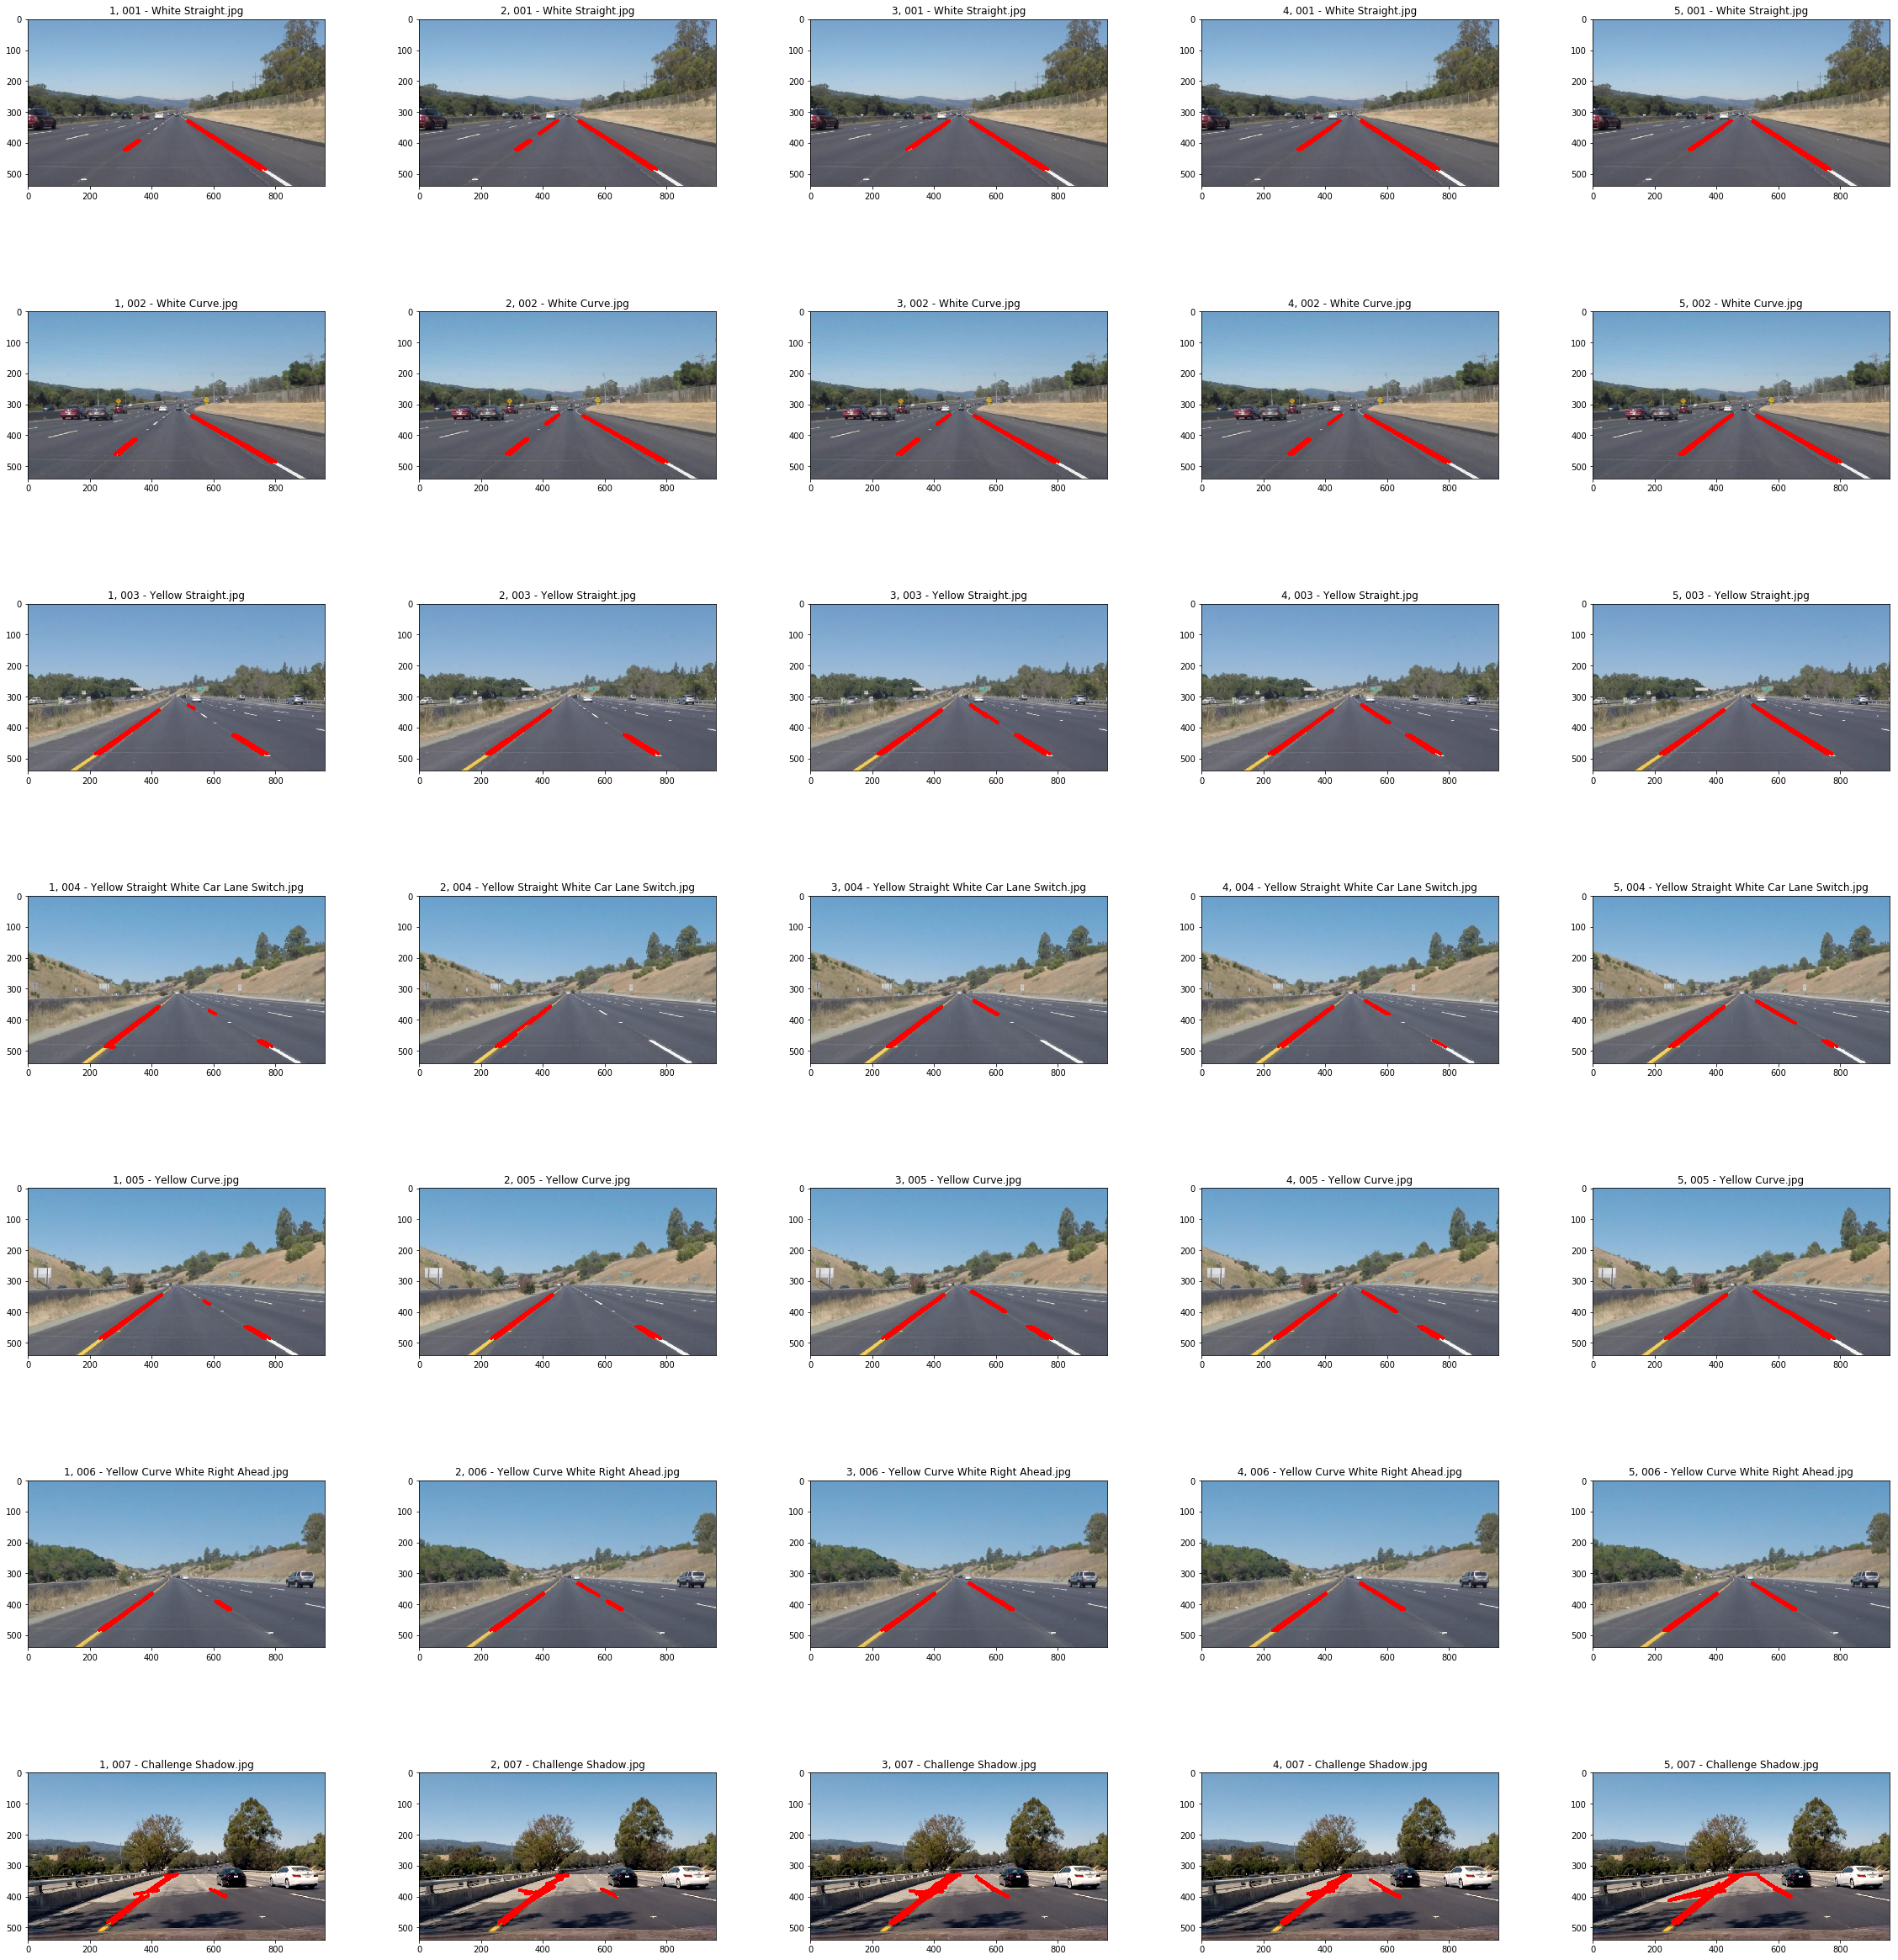

In [11]:

# Hough Transform

# Get a grid

gs = P.getGrid(len(imagesNames), 5) 

for i in range(imagesCount): 
    imageName = imagesNames[i]
    imageRGB = imagesRGB[i]
    imageBW = imagesBW[i]
    
    lines = IP.houghLines(imageBW, 1, np.pi / 180, 15, 20, 10)
    ax = plt.subplot(gs[i, 0])
    ax.imshow(IP.drawLines(imageRGB, lines), cmap="gray")
    ax.set_title("1, %s" % imageName)
    
    lines = IP.houghLines(imageBW, 2, np.pi / 180, 15, 40, 20)
    ax = plt.subplot(gs[i, 1])
    ax.imshow(IP.drawLines(imageRGB, lines), cmap="gray")
    ax.set_title("2, %s" % imageName)
    
    lines = IP.houghLines(imageBW, 2, np.pi / 180, 15, 40, 40)
    ax = plt.subplot(gs[i, 2])
    ax.imshow(IP.drawLines(imageRGB, lines), cmap="gray")
    ax.set_title("3, %s" % imageName)
    
    lines = IP.houghLines(imageBW, 2, np.pi / 180, 30, 40, 40)
    ax = plt.subplot(gs[i, 3])
    ax.imshow(IP.drawLines(imageRGB, lines), cmap="gray")
    ax.set_title("4, %s" % imageName)
    
    lines = IP.houghLines(imageBW, 2, np.pi / 180, 30, 20, 80)
    ax = plt.subplot(gs[i, 4])
    ax.imshow(IP.drawLines(imageRGB, lines), cmap="gray")
    ax.set_title("5, %s" % imageName)

# We take the last one (5), with rho = 2, theta = np.pi / 180, threshold = 30,
# minLineLength = 20 and maxLineLength = 80

imagesHoughLines = list(map(lambda imageBW: IP.houghLines(imageBW, 2, np.pi / 180, 30, 20, 80), imagesBW))


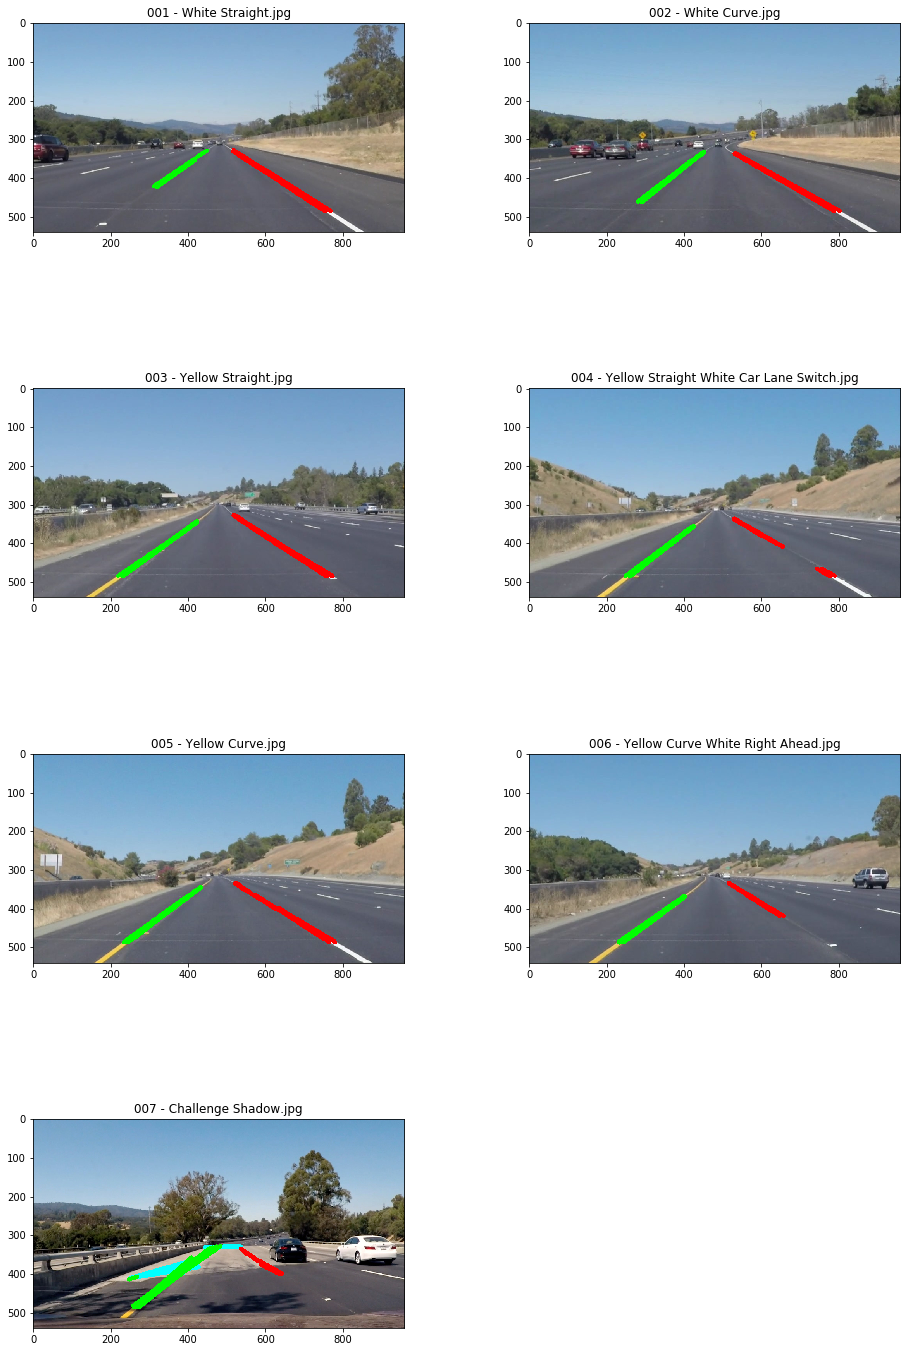

In [12]:

# Classify lines' points 

linesPoints = list(map(lambda imageHough: IP.classifyLinesPoints(imageHough, WIDTH), imagesHoughLines))

# Get a grid

gs = P.getGridFor(len(imagesNames), 2) 

for i in range(imagesCount): 
    imageName = imagesNames[i]
    imageRGB = imagesRGB[i]
    
    currentLinesPoints = linesPoints[i]
    discardedLines = currentLinesPoints['discarded']
    rightLines = currentLinesPoints['right']['lines']
    leftLines = currentLinesPoints['left']['lines']
    
    mergedLinesImage = IP.drawLines(imageRGB, discardedLines, color=[0, 255, 255])
    mergedLinesImage = IP.drawLines(mergedLinesImage, rightLines, color=[255, 0, 0], make_copy=False)
    mergedLinesImage = IP.drawLines(mergedLinesImage, leftLines, color=[0, 255, 0], make_copy=False)
    
    ax = plt.subplot(gs[i // 2, i % 2])
    ax.imshow(mergedLinesImage, cmap="gray")
    ax.set_title("%s" % imageName)


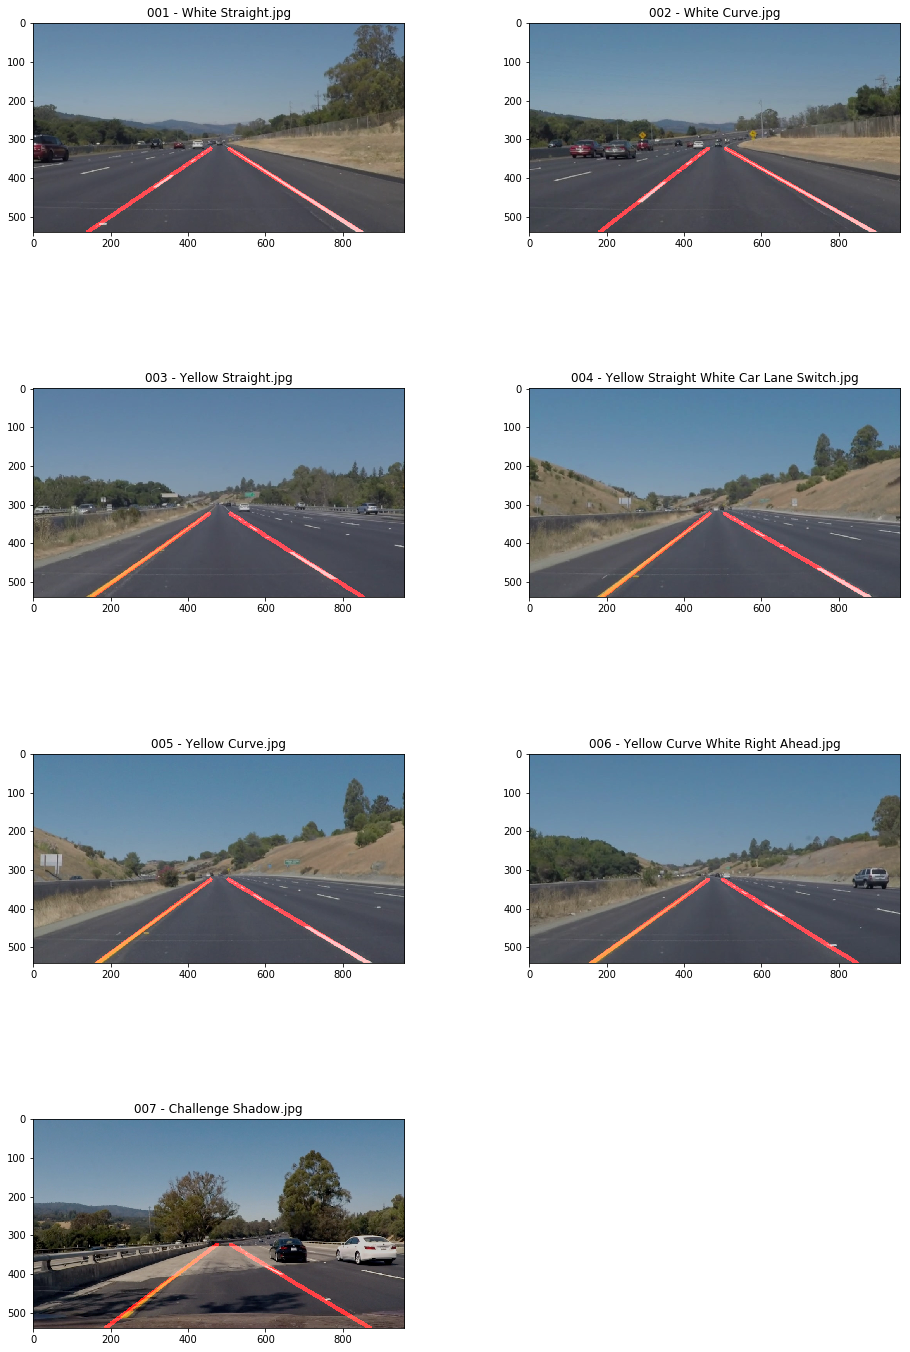

In [13]:

# Extract the two lines using linear regression

# Get a grid

gs = P.getGridFor(len(imagesNames), 2) 

for i in range(imagesCount): 
    imageName = imagesNames[i]
    imageRGB = imagesRGB[i]
    imageLines = np.zeros((imageRGB.shape[0], imageRGB.shape[1], 3), dtype=np.uint8)
    
    currentLinesPoints = linesPoints[i]
    right = currentLinesPoints['right']
    left = currentLinesPoints['left']
    
    # TODO: Maybe just return the line and draw it here
    
    rightLineStream = LRM.LineStream()
    leftLineStream = LRM.LineStream()

    rightLineStream.drawLineFromPoints(imageLines, right['X'], right['Y'], right['weights'])
    leftLineStream.drawLineFromPoints(imageLines, left['X'], left['Y'], left['weights'])

    ax = plt.subplot(gs[i // 2, i % 2])
    ax.imshow(IP.weighted_img(imageLines, imageRGB), cmap="gray")
    ax.set_title("%s" % imageName)


